## 1. Import pandas und NumPy, so you can call them by  an abbreviation 

In [26]:
import numpy as np  # noqa: F401
import pandas as pd

## 2. Create a DataFrame that contains the information shown below

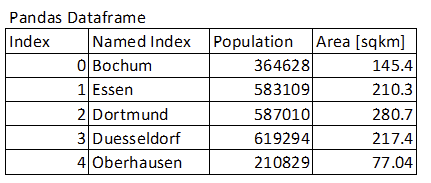

In [27]:
data = {
    'city': ['Bochum', 'Essen', 'Dortmund', 'Duesseldorf', 'Oberhausen'],
    'pop': [364628, 583109, 587010, 619294, 210829],
    'area': [145.4, 210.3, 280.7, 217.4, 77.04],
}
df = pd.DataFrame(data)
df

,city,pop,area
0,Bochum,364628,145.40
1,Essen,583109,210.30
2,Dortmund,587010,280.70
3,Duesseldorf,619294,217.40
4,Oberhausen,210829,77.04


## 3. Use the DataFrame from the previous task to calculate a new column with the population density for each city

In [28]:
df['pop_den'] = df['pop'] / df['area']
df

,city,pop,area,pop_den
0,Bochum,364628,145.40,2507.757909
1,Essen,583109,210.30,2772.748455
2,Dortmund,587010,280.70,2091.236195
3,Duesseldorf,619294,217.40,2848.638454
4,Oberhausen,210829,77.04,2736.617342


## 4. Load the CSV file  "Luftmessstationen-Messwerte_EPSG25832_CSV.csv"

In [29]:
df_aq = pd.read_csv(
    '../data/Luftmessstationen-Messwerte_EPSG25832.csv',
    sep=';',
)
df_aq

,MESSPUNKT,JAHR,MONAT,ZEIT_VON,ZEIT_BIS,MESSWERT
0,1,2008,Januar,20080103,20080201,37
1,1,2008,Februar,20080201,20080229,55
2,1,2008,März,20080229,20080401,44
3,1,2008,April,20080401,20080430,53
4,1,2008,Mai,20080430,20080530,55
...,...,...,...,...,...,...
4401,1031,2022,Februar,20220129,20220302,18
4402,1031,2022,März,20220302,20220331,24
4403,1031,2022,April,20220331,20220502,20
4404,1031,2022,Mai,20220502,20220601,16


 ## 5. Replace -9999 by NaN
If you open the CSV in Excel, you will notice that there are some measurements with -9999. This NoData value will effect statistical calculations and should be replaced by 'NaN'. Check Google how to solve this issue, or use [this link](https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan) if you do not find any answers.
Hint1: It is easier to replace the NoData value for the whole DataFrame
Hint2: Store it in a new variable

In [30]:
df_aq = pd.read_csv(
    '../data/Luftmessstationen-Messwerte_EPSG25832.csv',
    sep=';',
    na_values='-9999',
)
df_aq

,MESSPUNKT,JAHR,MONAT,ZEIT_VON,ZEIT_BIS,MESSWERT
0,1,2008,Januar,20080103,20080201,37.0
1,1,2008,Februar,20080201,20080229,55.0
2,1,2008,März,20080229,20080401,44.0
3,1,2008,April,20080401,20080430,53.0
4,1,2008,Mai,20080430,20080530,55.0
...,...,...,...,...,...,...
4401,1031,2022,Februar,20220129,20220302,18.0
4402,1031,2022,März,20220302,20220331,24.0
4403,1031,2022,April,20220331,20220502,20.0
4404,1031,2022,Mai,20220502,20220601,16.0


## 6. Calculate the mean, stdv, min, max and quantiles of the NO2 values for each measuring point

In [31]:
df_aq_stat = df_aq[['MESSPUNKT', 'MESSWERT']].groupby('MESSPUNKT').describe()

## 7. Filter for measuring station 22

In [32]:
df_22 = df_aq[df_aq['MESSPUNKT'] == 22]
df_22

,MESSPUNKT,JAHR,MONAT,ZEIT_VON,ZEIT_BIS,MESSWERT
2382,22,2008,Januar,20080103,20080201,34.0
2383,22,2008,Februar,20080201,20080229,55.0
2384,22,2008,März,20080229,20080401,44.0
2385,22,2008,April,20080401,20080430,57.0
2386,22,2008,Mai,20080430,20080530,58.0
...,...,...,...,...,...,...
2551,22,2022,Februar,20220129,20220302,27.0
2552,22,2022,März,20220302,20220331,36.0
2553,22,2022,April,20220331,20220502,30.0
2554,22,2022,Mai,20220502,20220601,29.0


## 8. Calculate the number of days with a NO2 value above 50 for station 22
Print the result with a f-string

In [33]:
(df_22['MESSWERT'] > 50).sum()

14

## 9. Save the DataFrame from task six to a new file 

In [34]:
df_aq_stat.to_csv('../data/df_aq_stat.csv')